In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
#import numpy as np
img = mpimg.imread('input1.png')

imgW = len(img[0])
imgH = len(img)

In [2]:

# FITNESS FUNCTION (SPHERE FUNCTION)
def f(x): # x IS A VECTOR REPRESENTING ONE FLY
	return -img[ int(x[0]), int(x[1]) ]
	

N = 100# POPULATION SIZE
D = 2					# DIMENSIONALITY 
delta = 0.001			# DISTURBANCE THRESHOLD 
maxIterations = 1000	# ITERATIONS ALLOWED
lowerB = [0]*D		# LOWER BOUND (IN ALL DIMENSIONS)
upperB = [imgW]*D		# UPPER BOUND (IN ALL DIMENSIONS)

# INITIALISATION PHASE
X = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

# INITIALISE FLIES WITHIN BOUNDS
for i in range(N):
	for d in range(D):
		X[i,d] = np.random.uniform(lowerB[d], upperB[d])
		

Iteration: 0 	Best fly index: 13 	Fitness value: -0.99215686


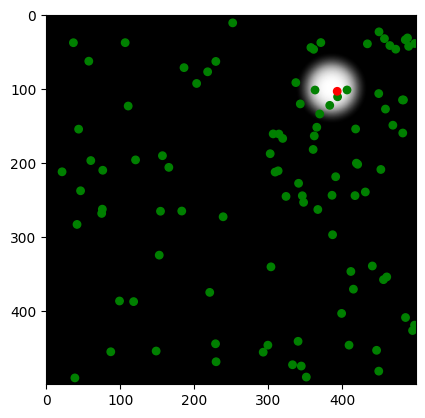

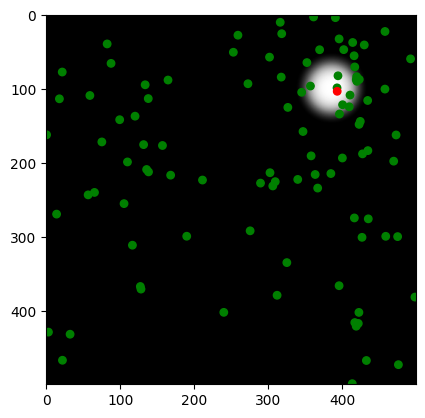

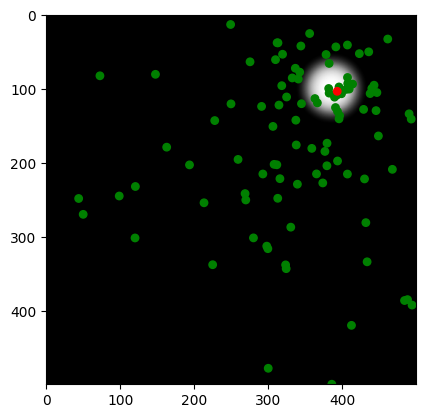

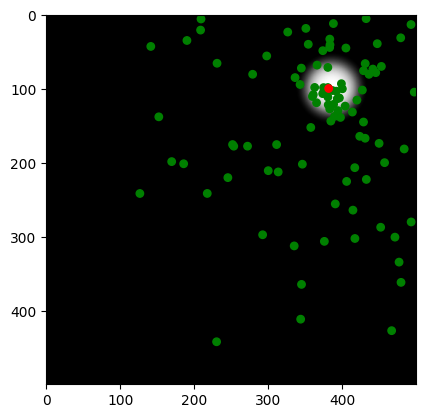

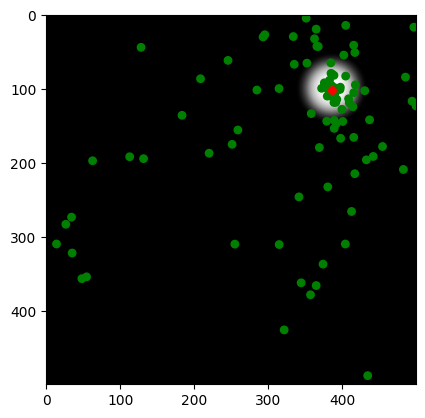

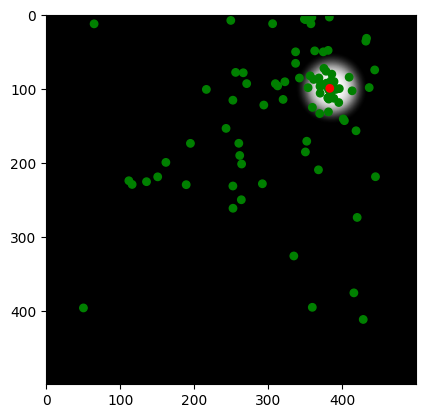

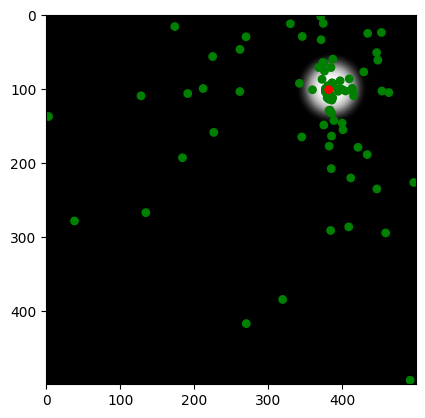

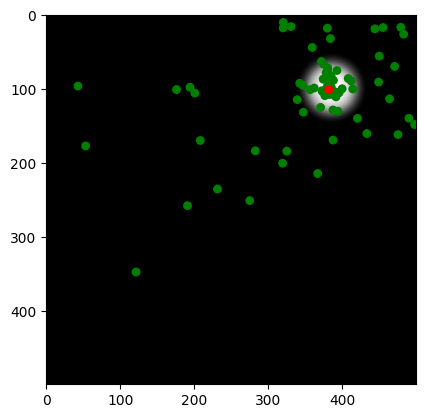

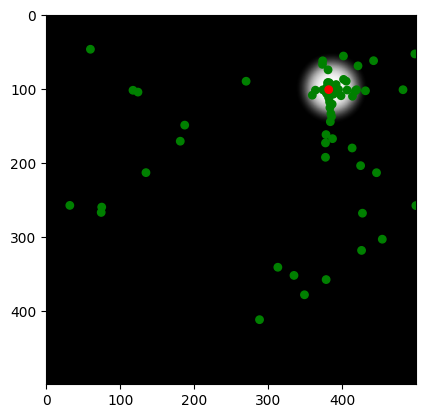

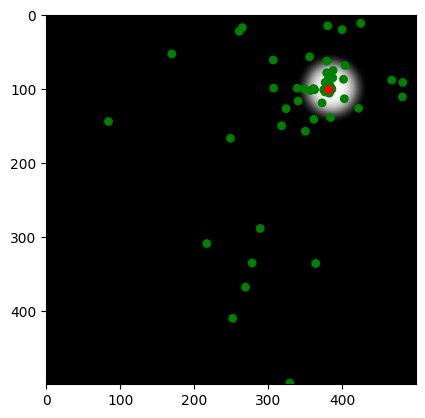

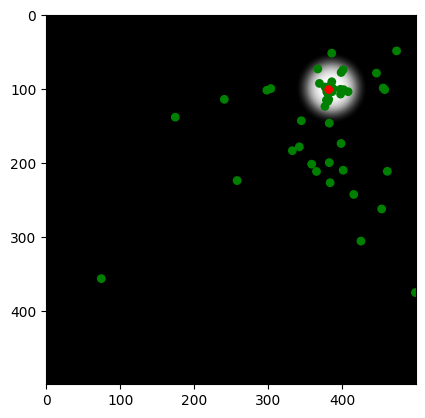

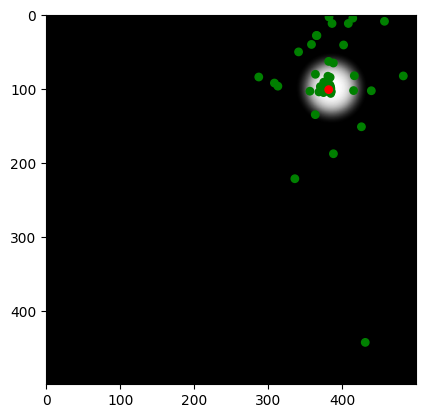

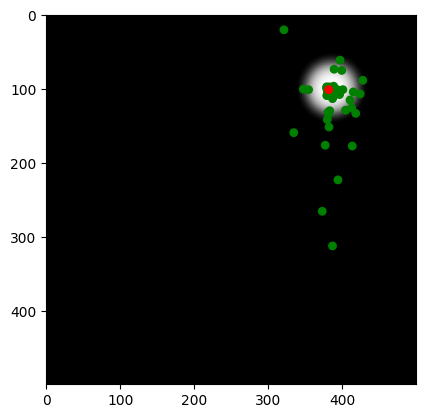

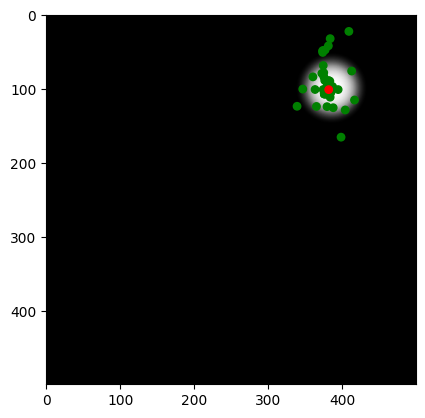

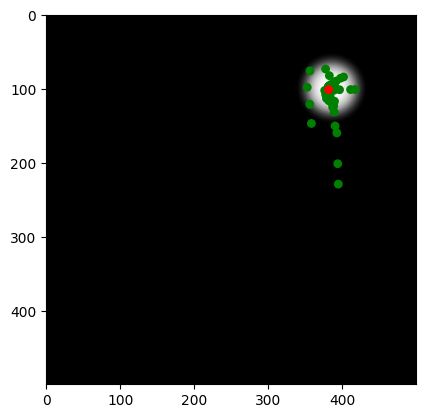

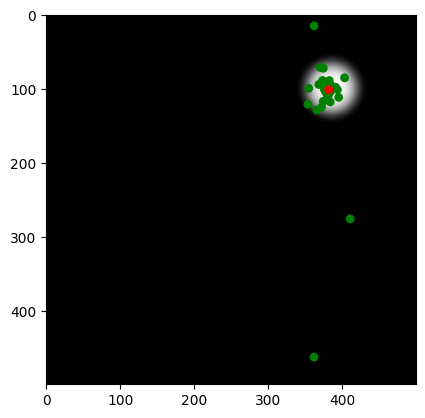

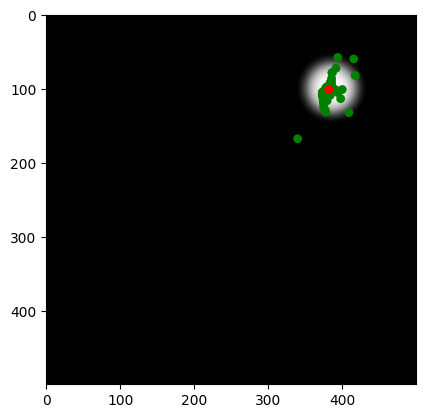

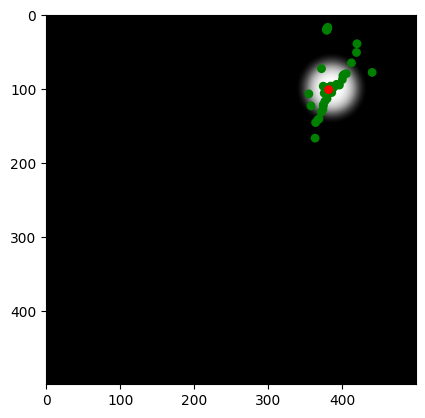

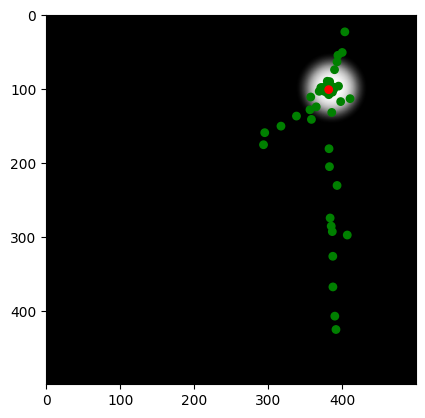

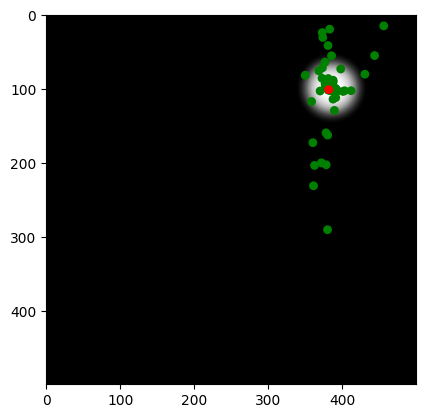

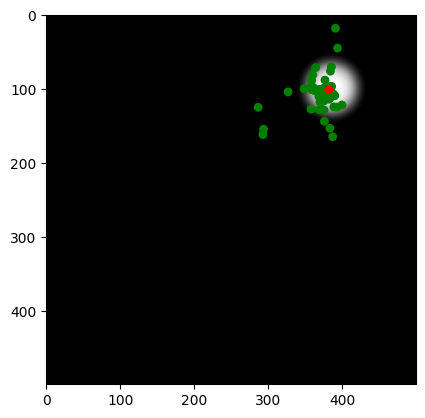

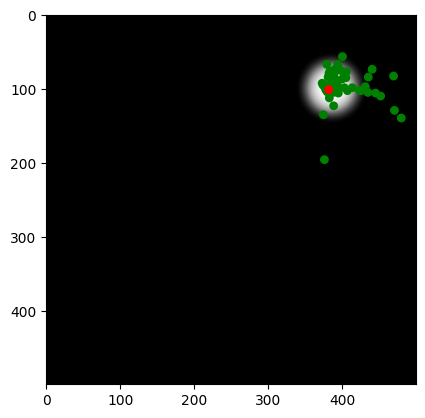

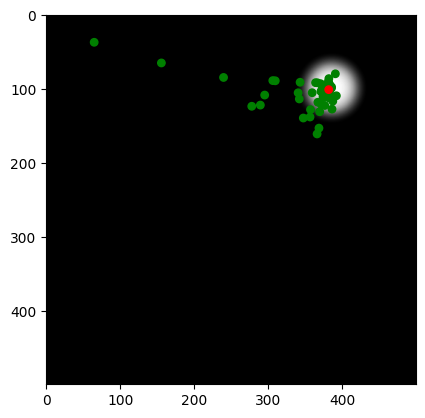

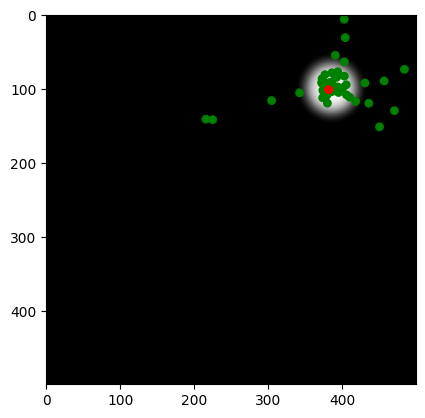

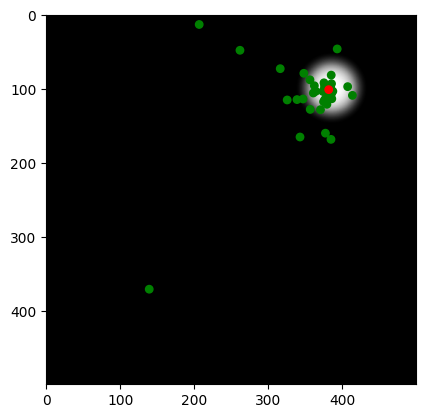

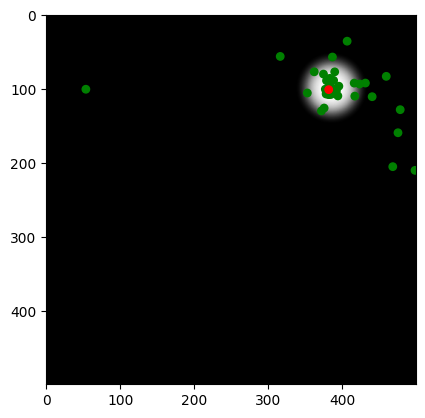

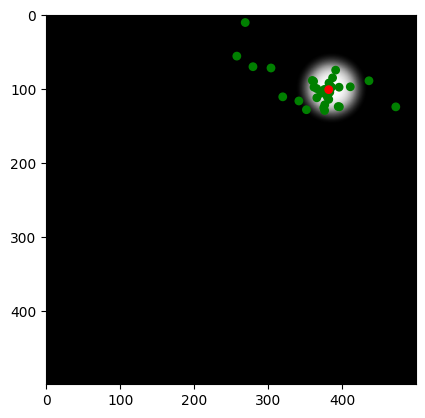

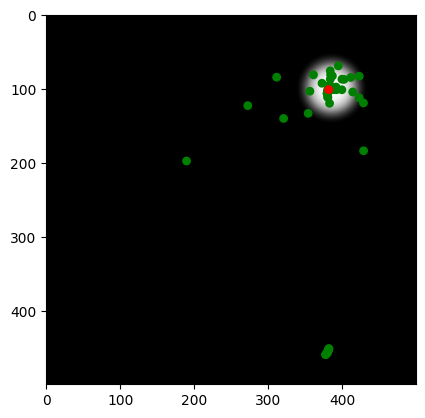

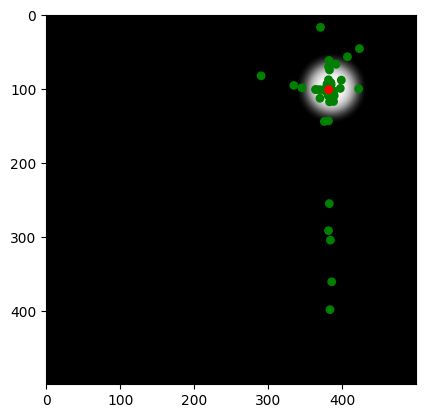

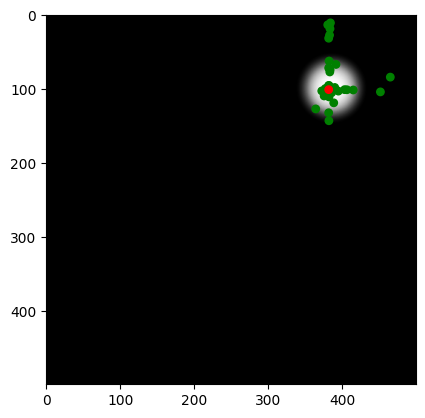

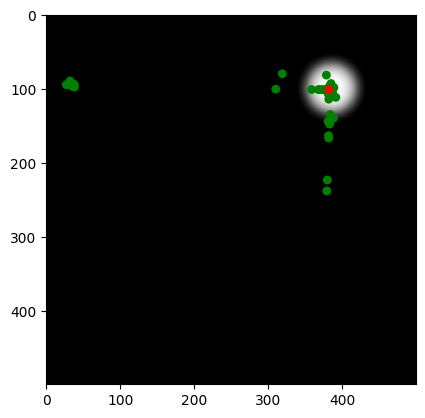

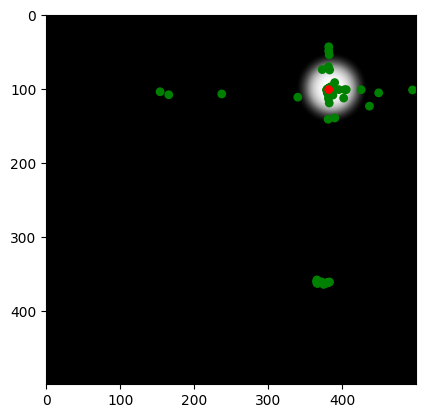

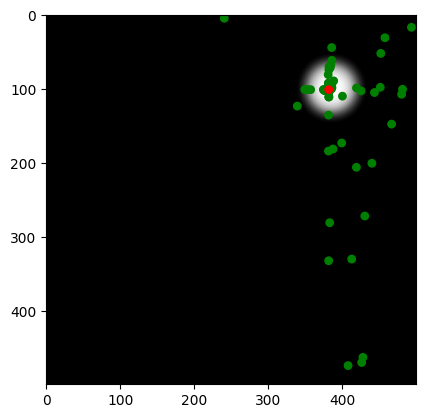

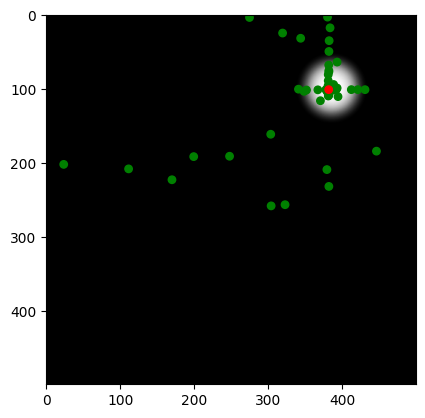

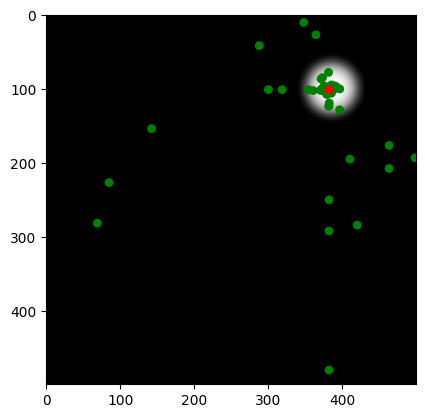

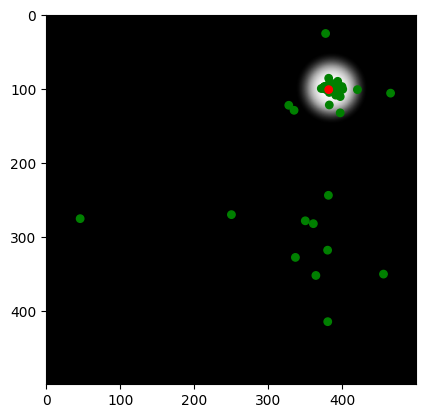

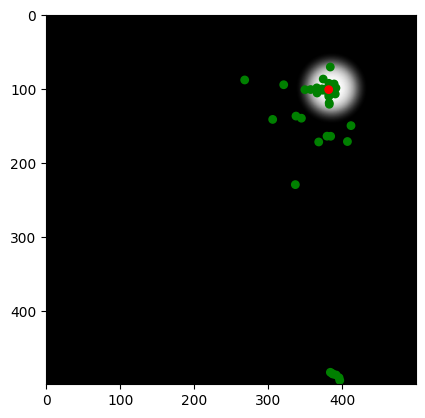

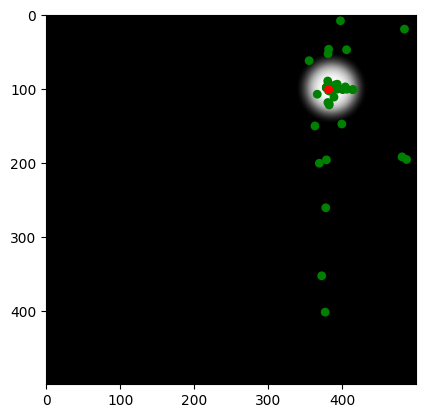

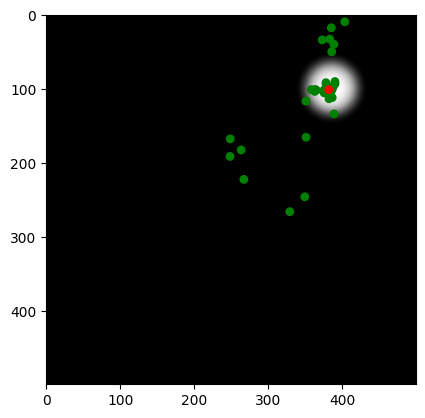

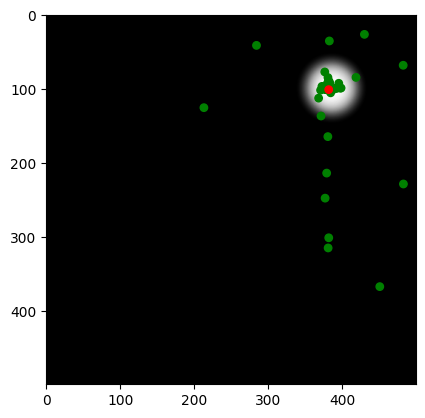

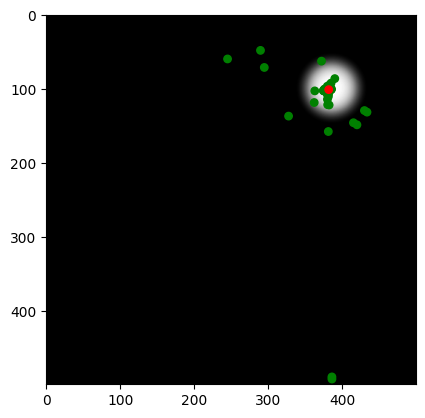

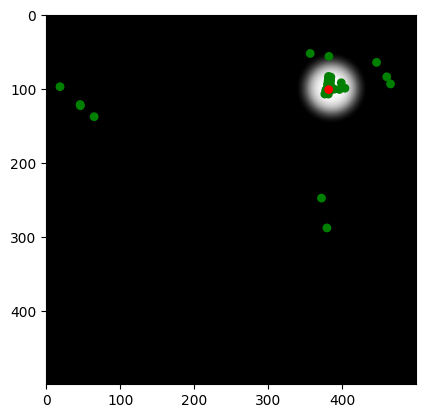

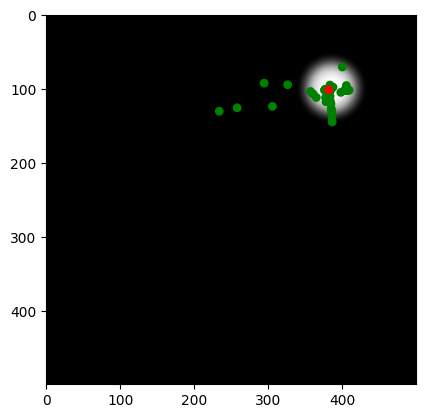

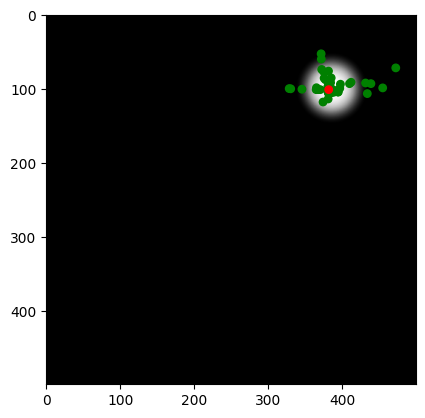

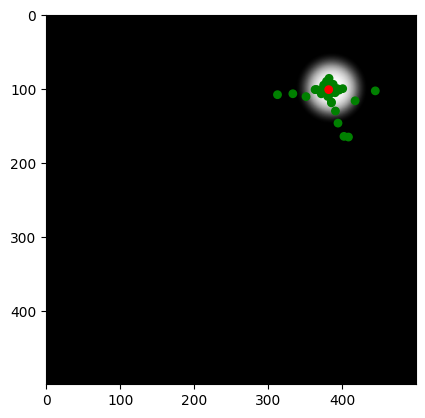

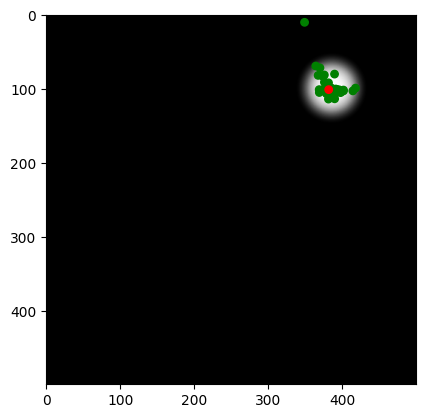

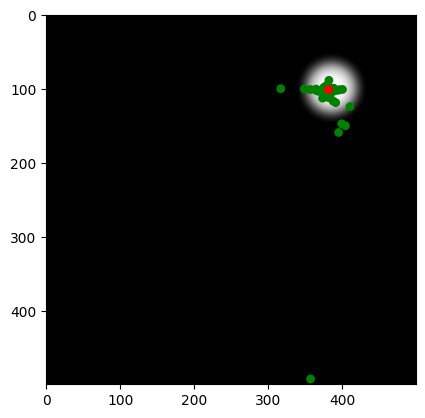

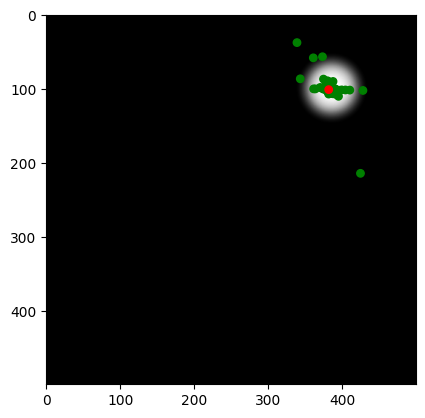

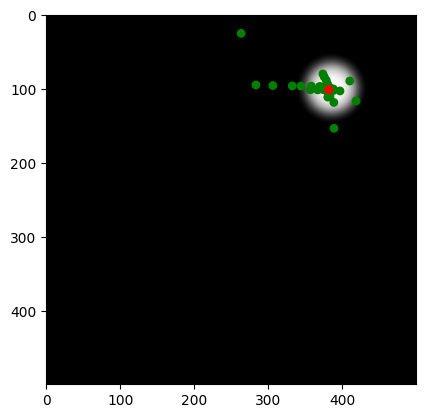

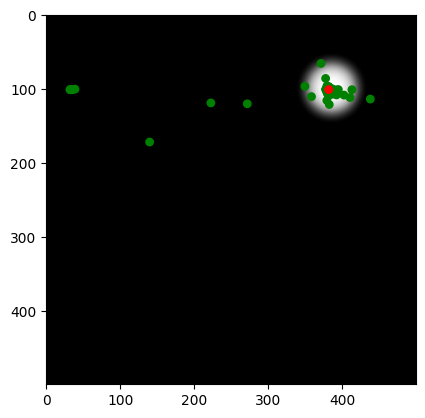

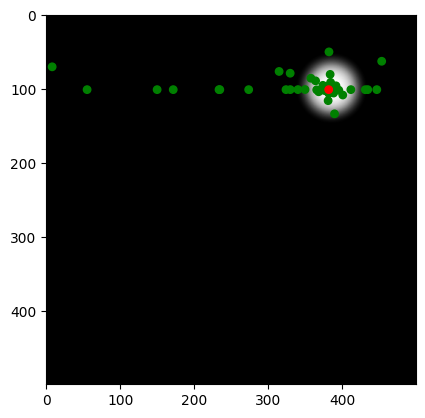

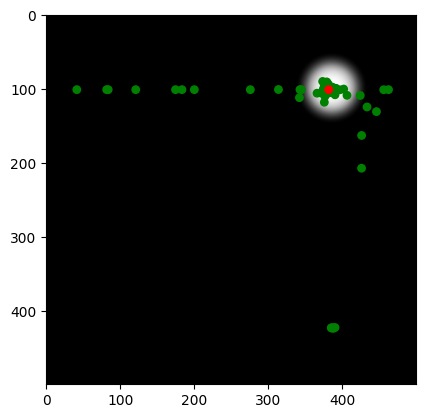

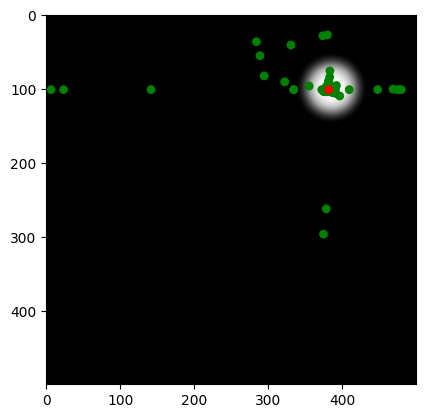

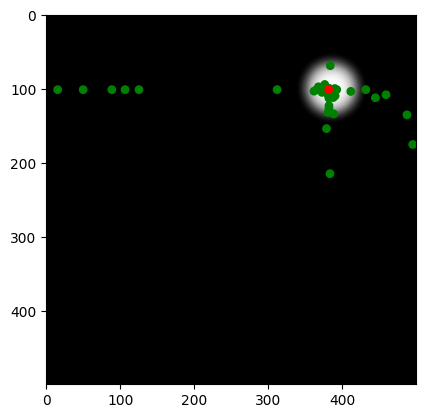

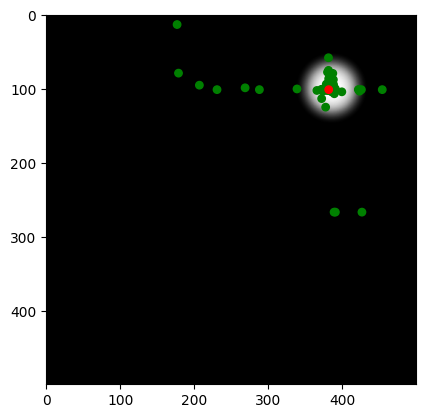

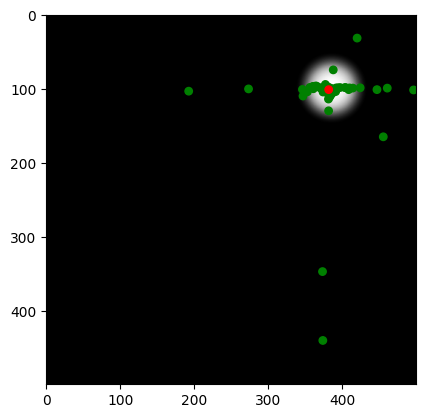

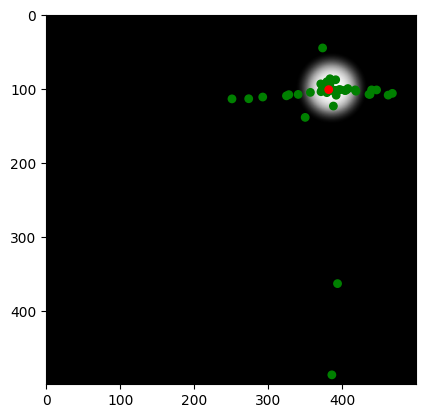

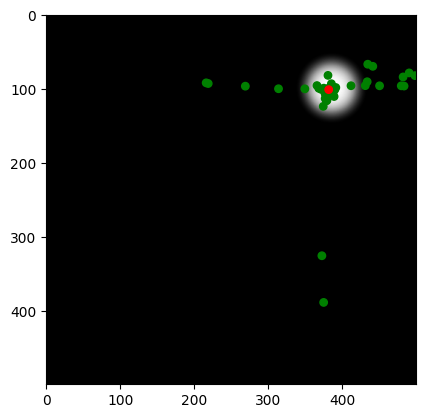

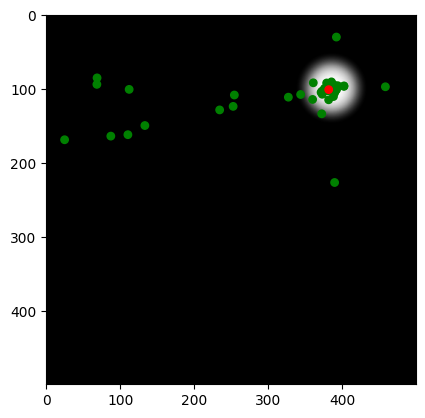

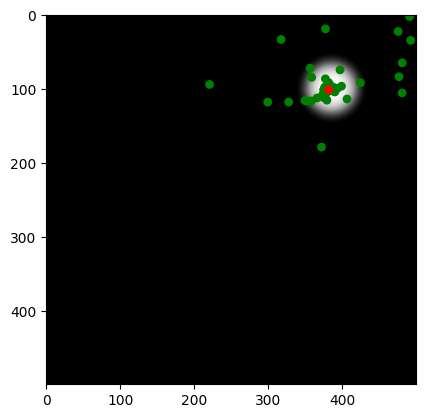

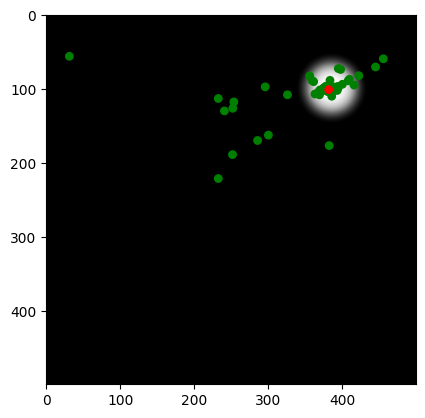

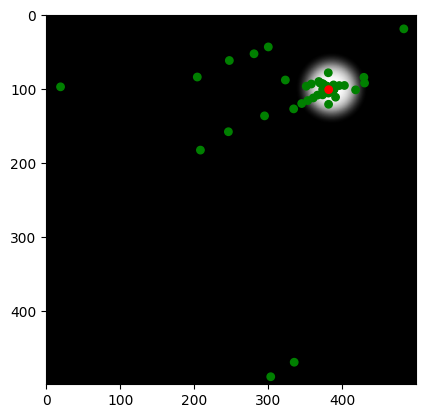

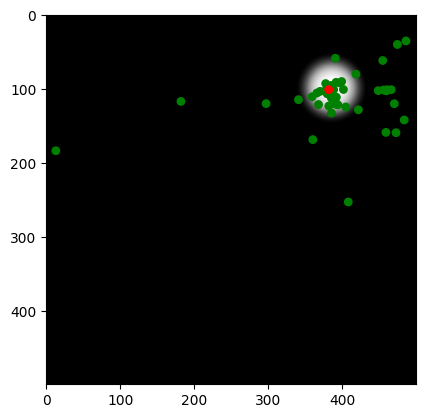

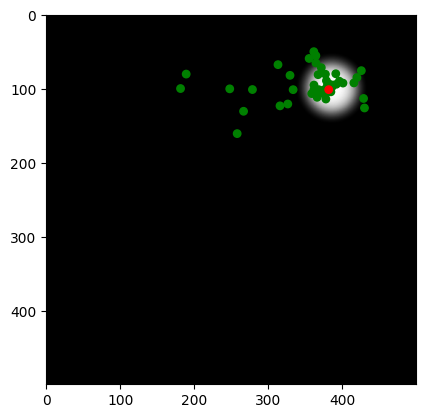

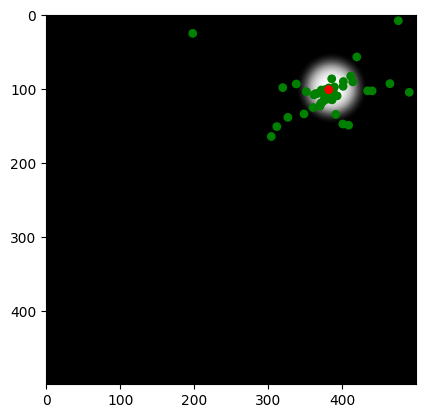

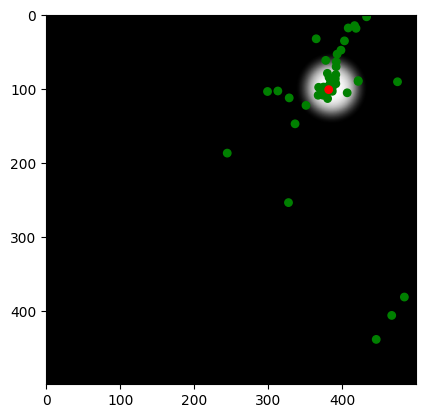

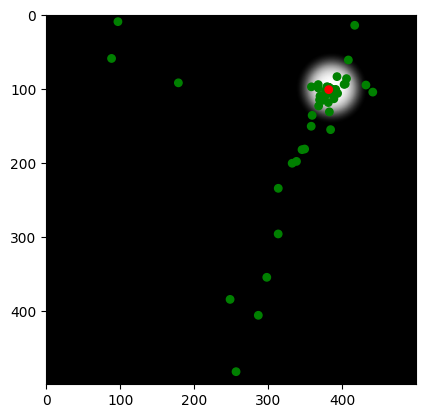

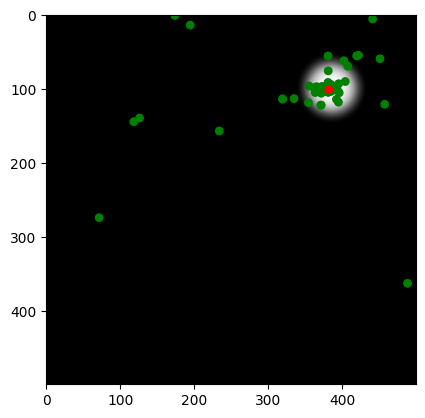

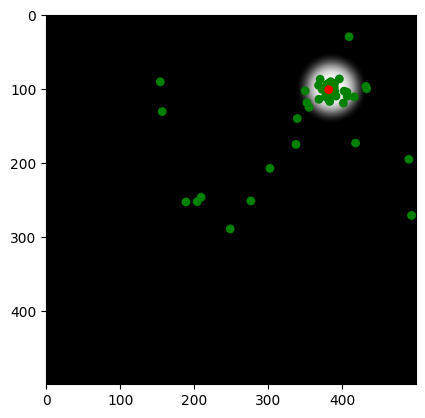

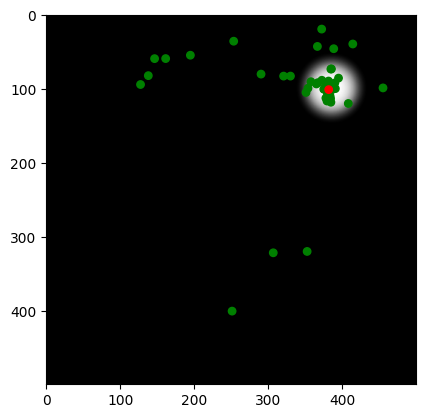

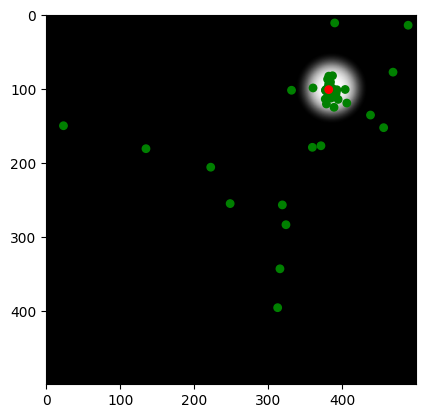

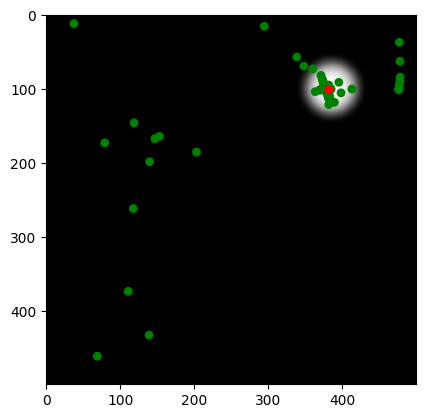

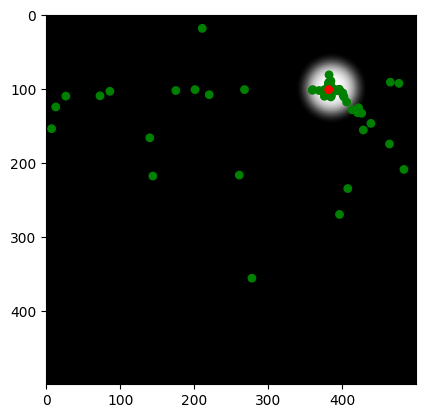

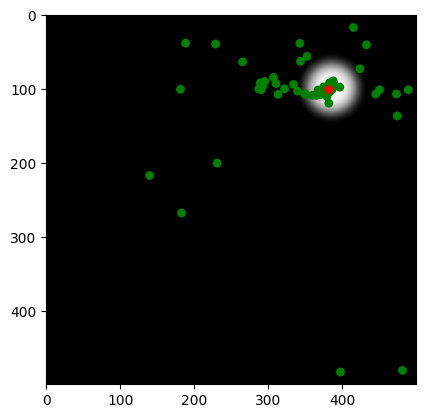

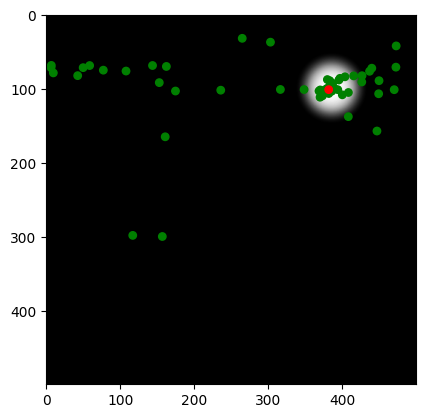

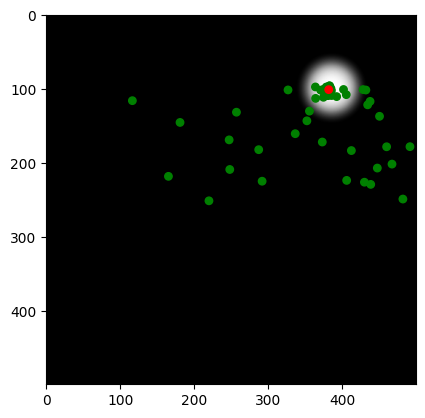

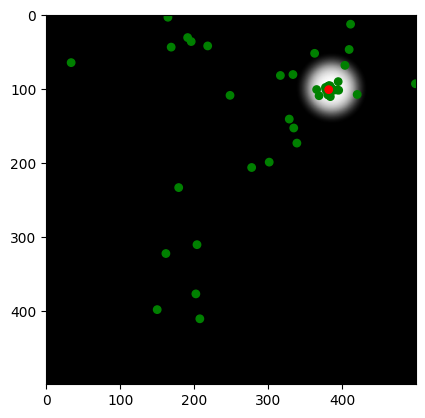

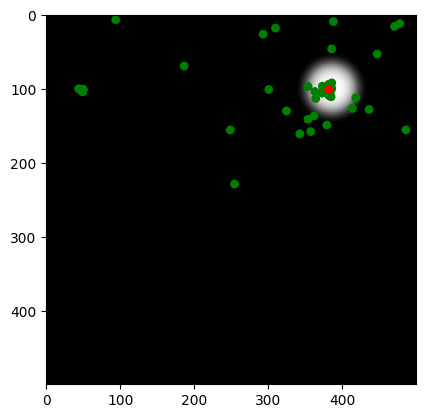

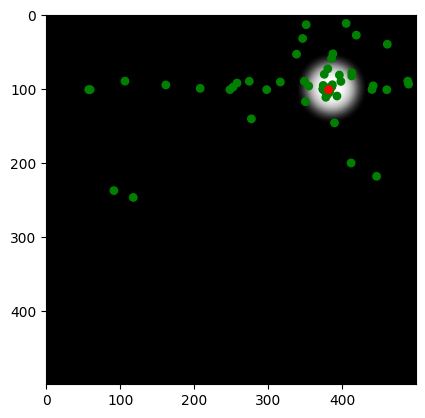

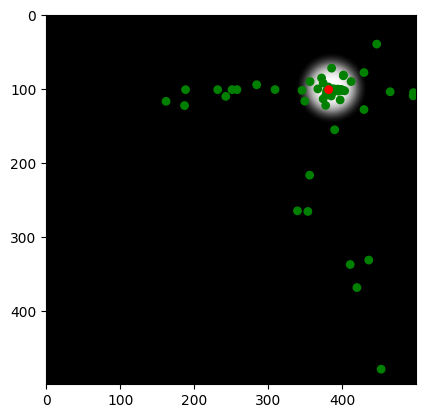

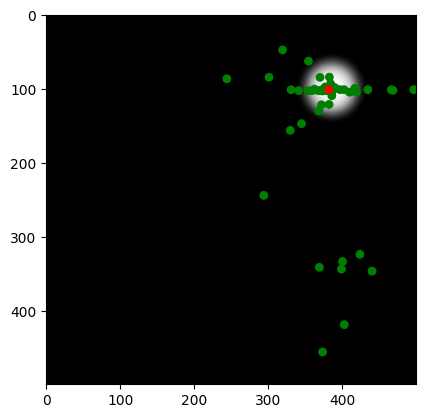

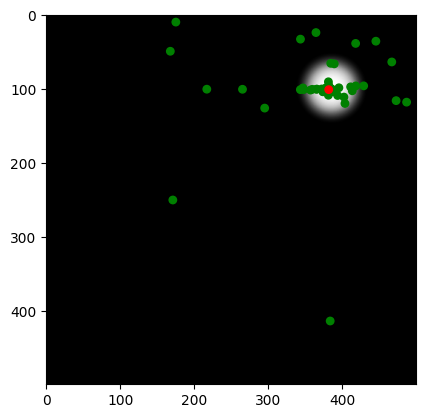

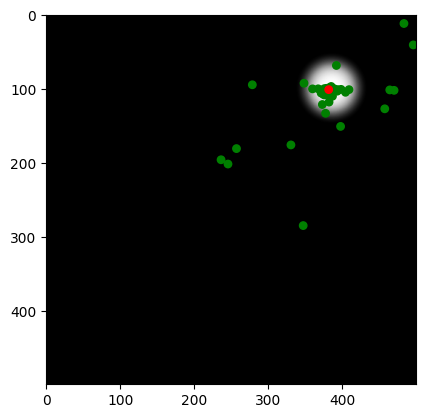

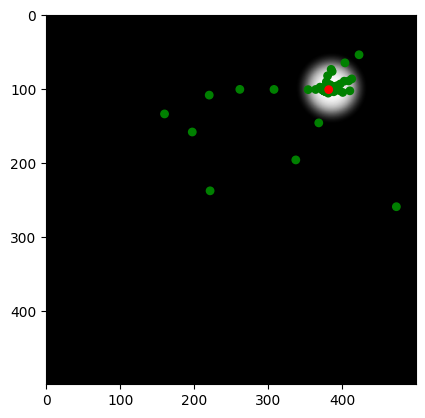

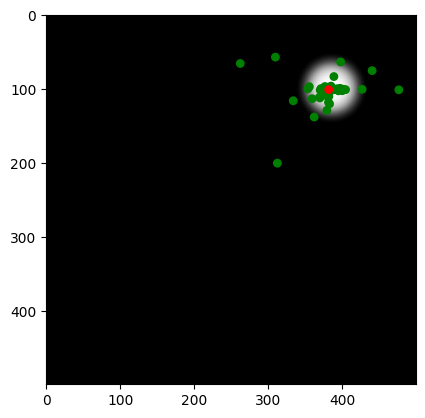

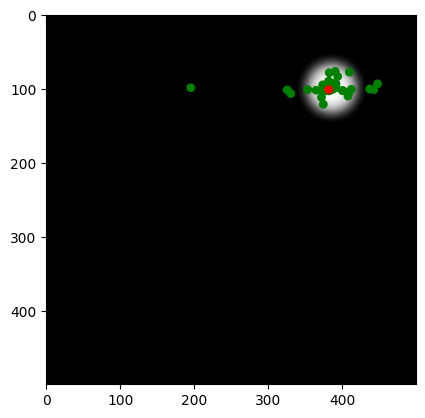

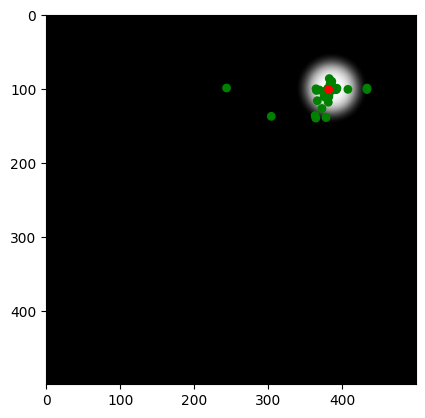

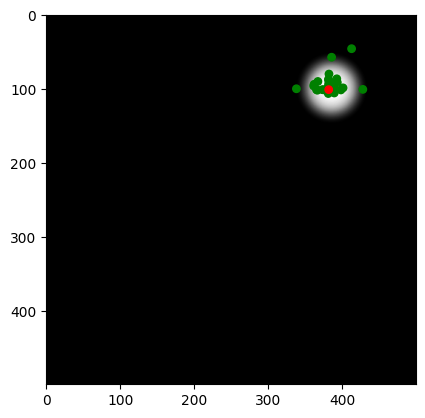

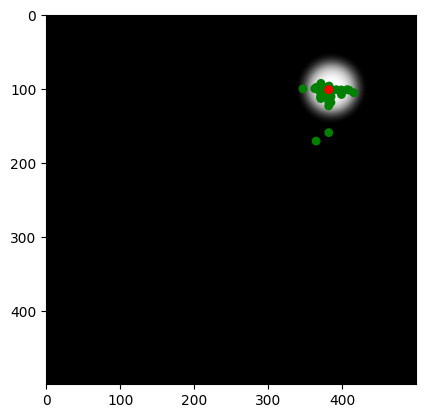

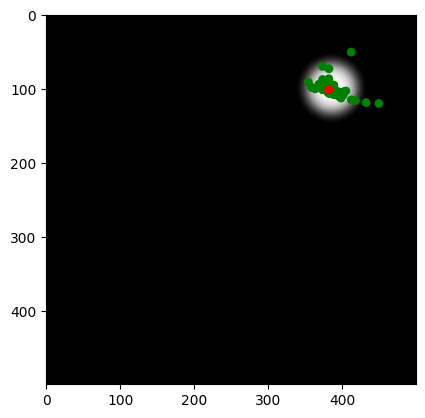

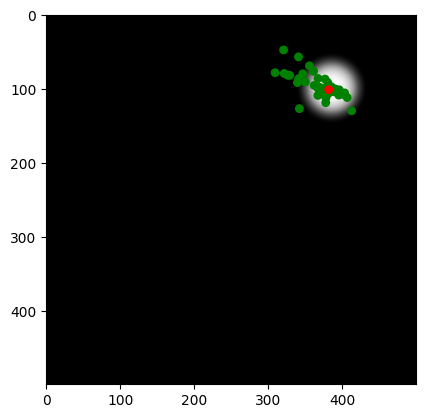

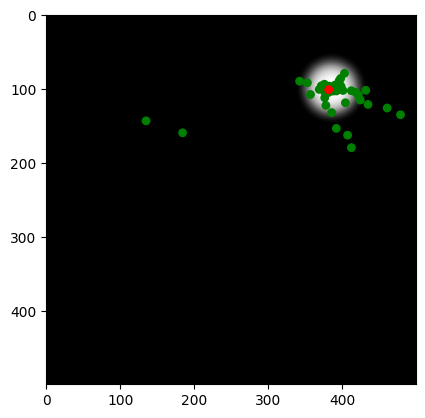

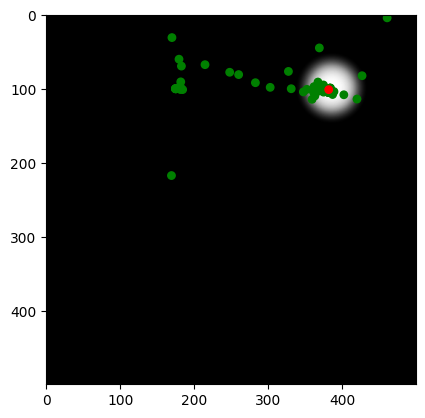

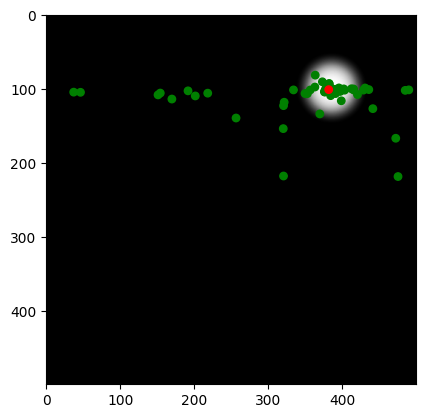

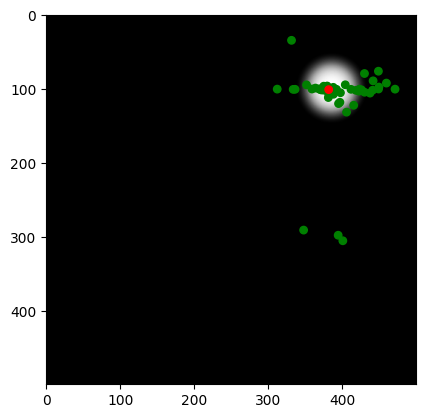

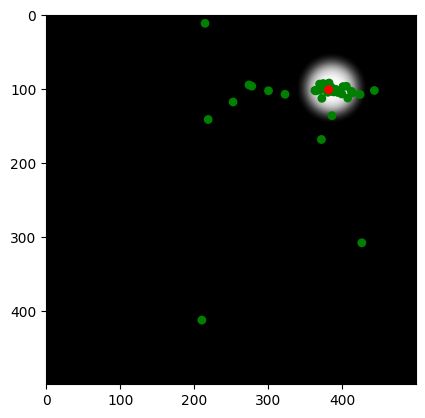

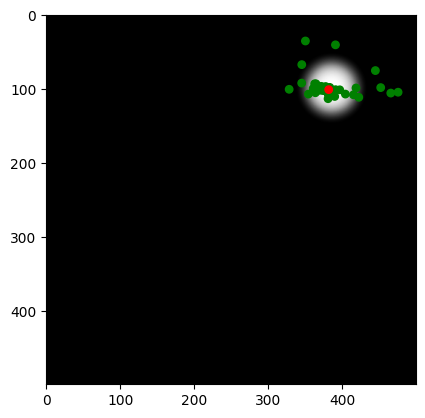

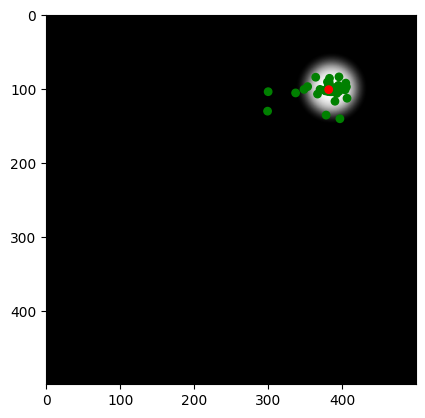

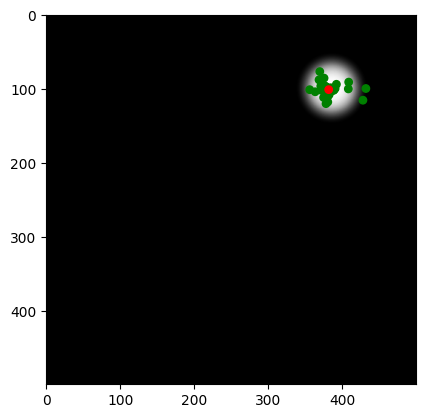

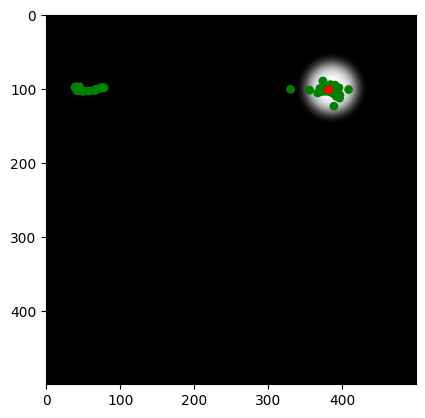

Iteration: 100 	Best fly index: 0 	Fitness value: -1.0


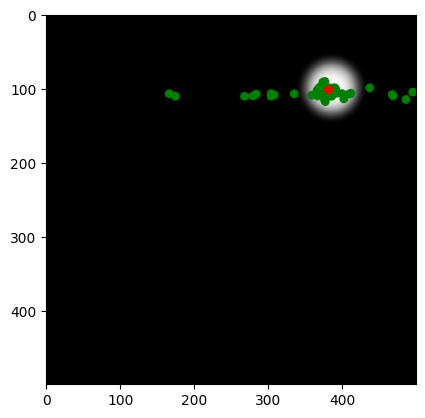

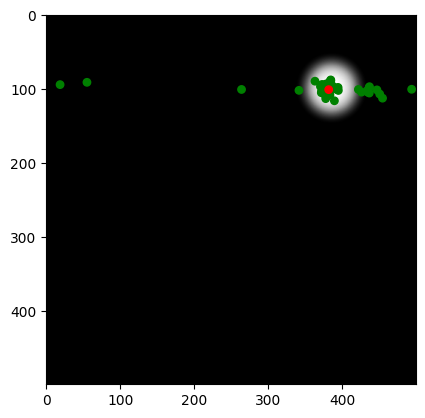

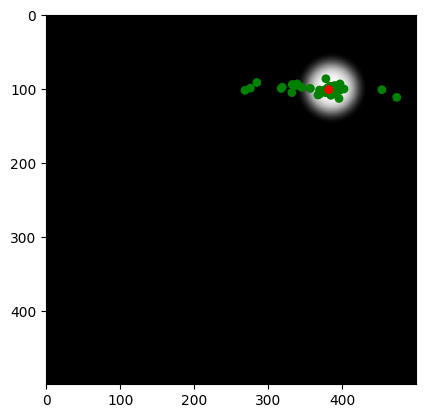

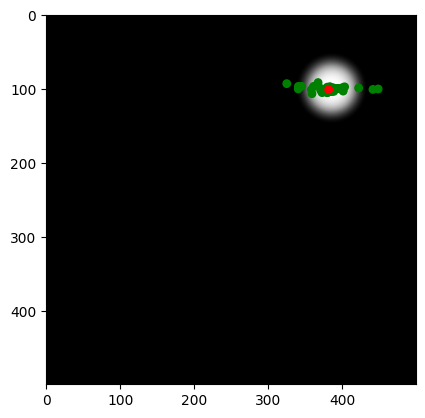

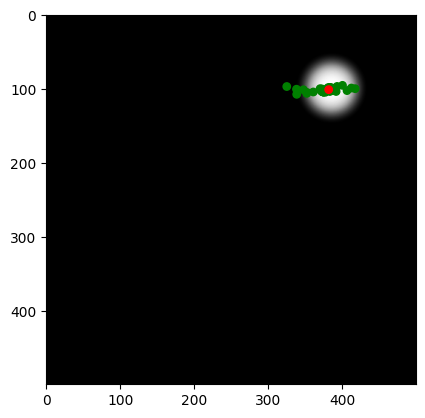

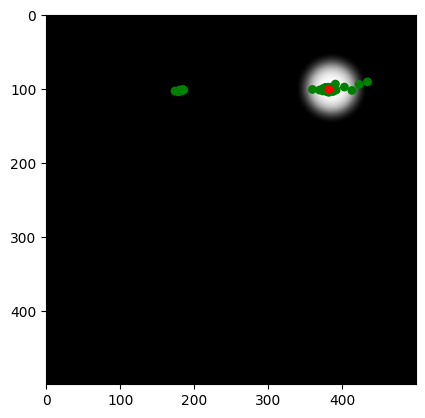

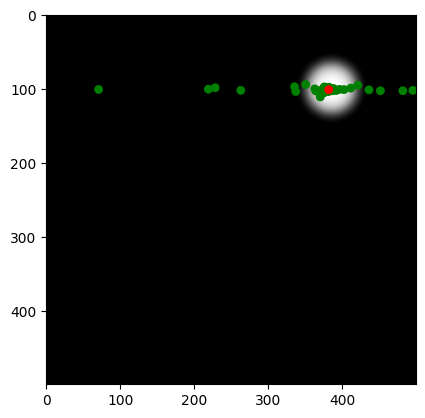

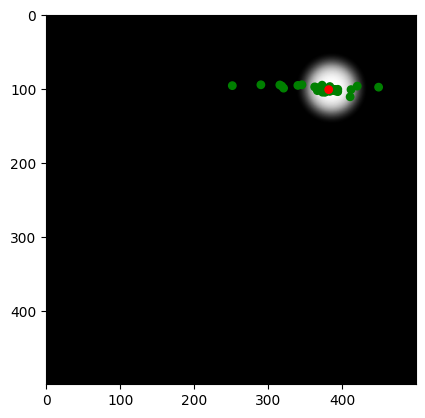

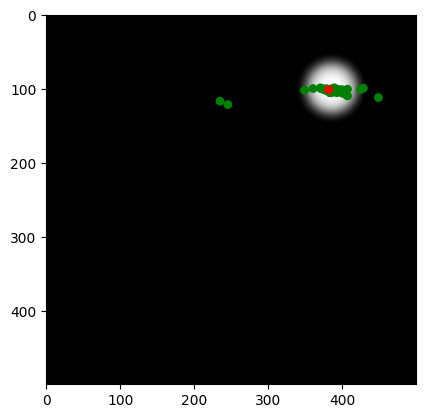

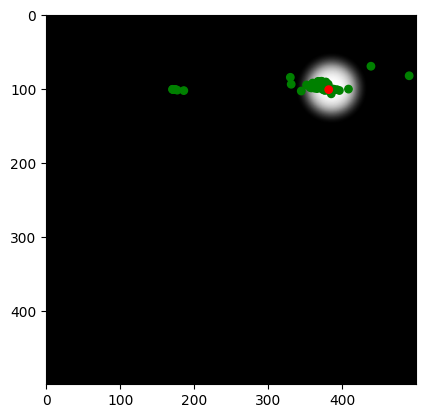

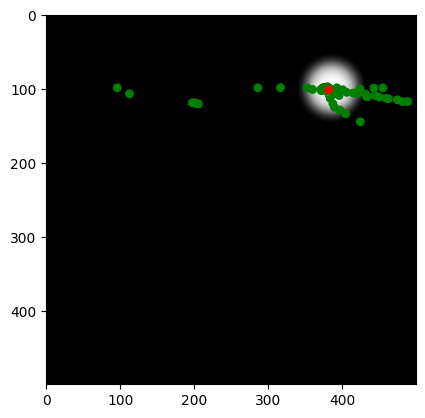

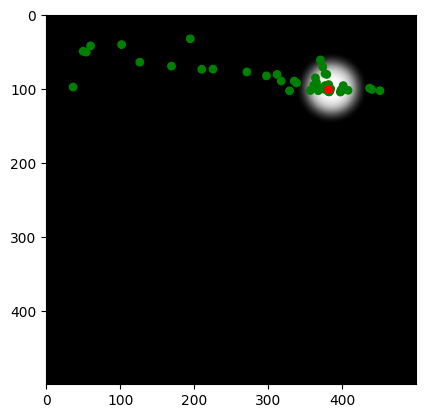

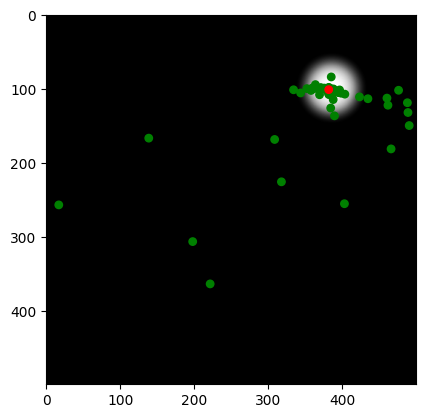

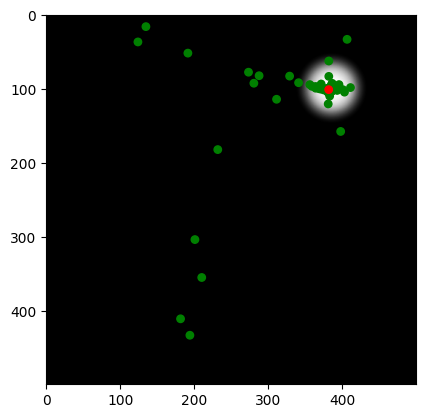

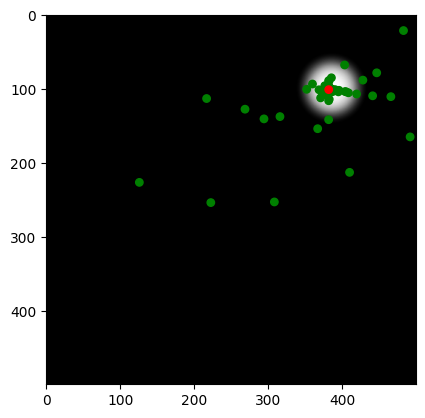

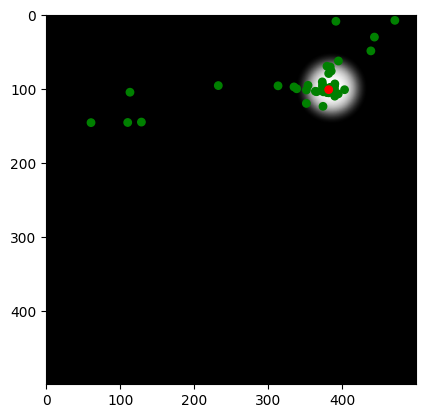

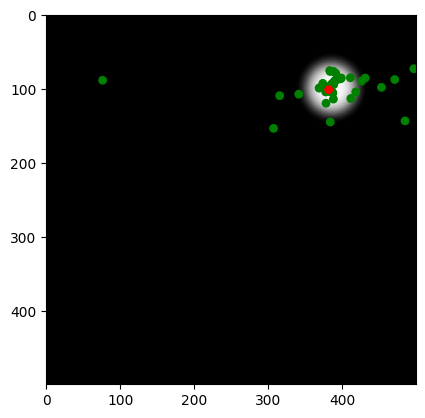

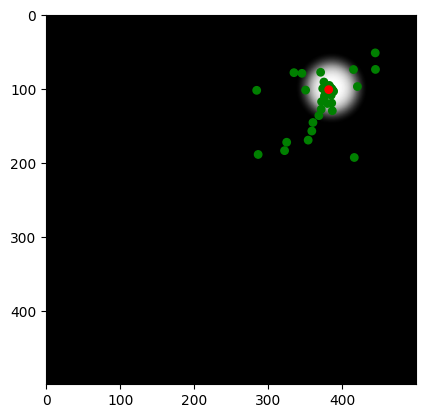

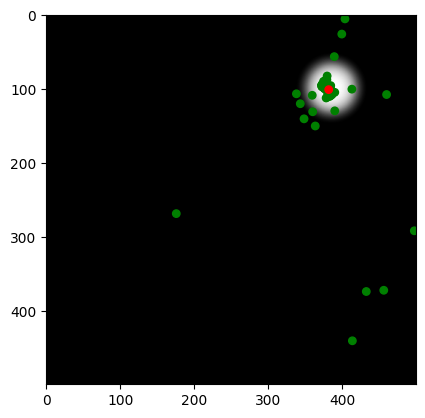

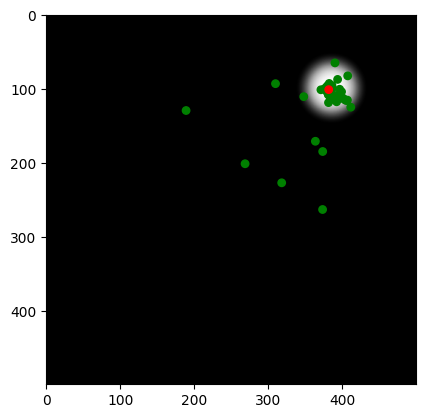

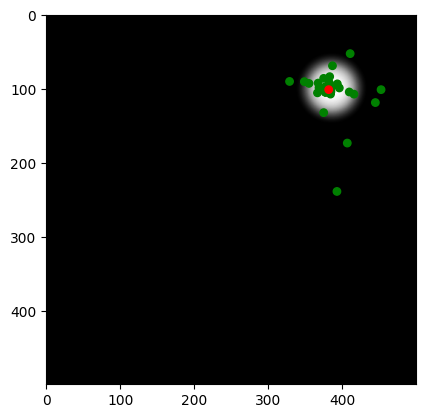

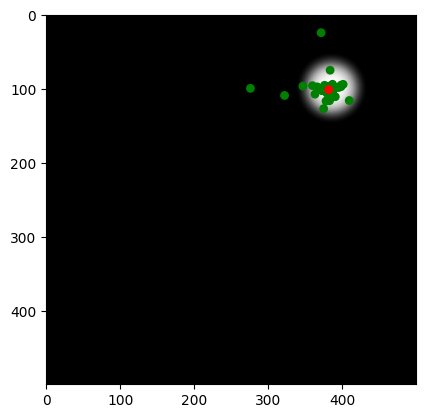

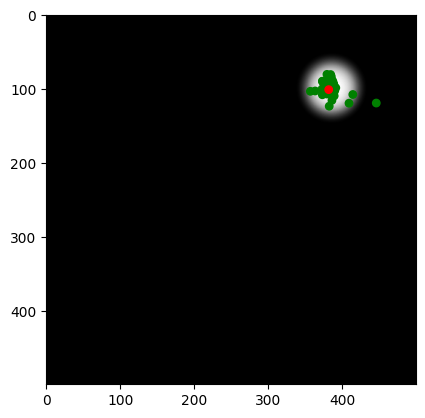

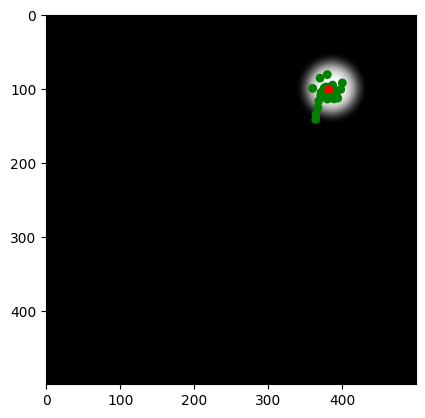

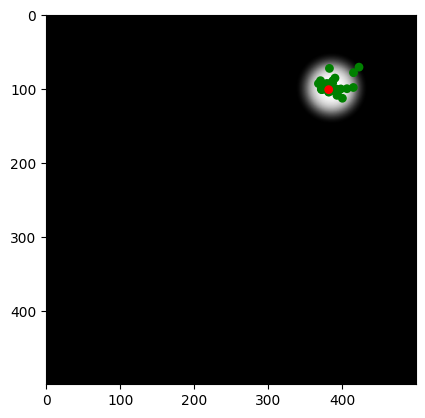

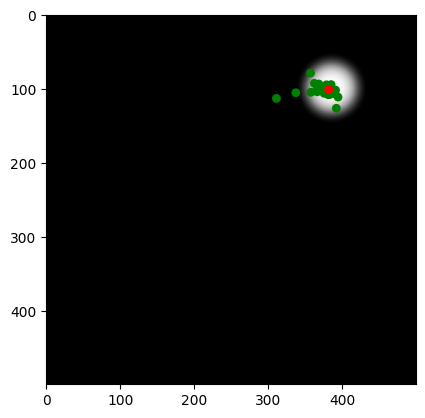

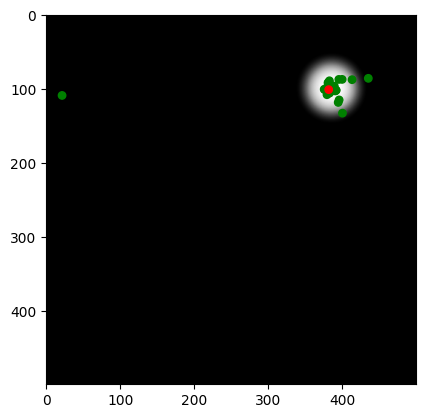

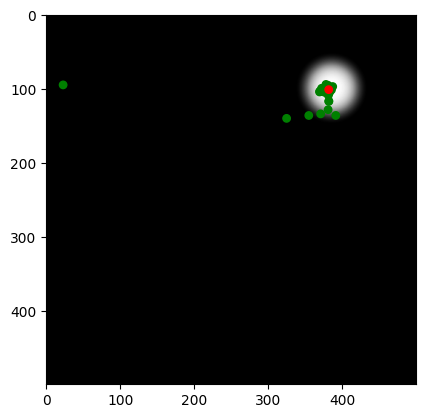

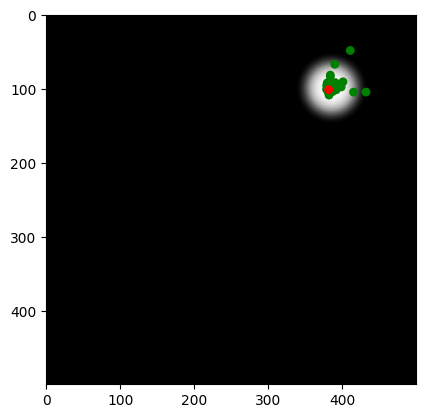

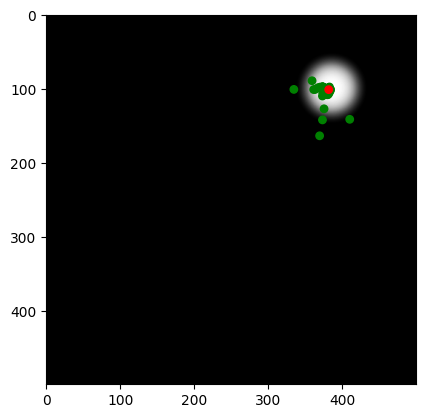

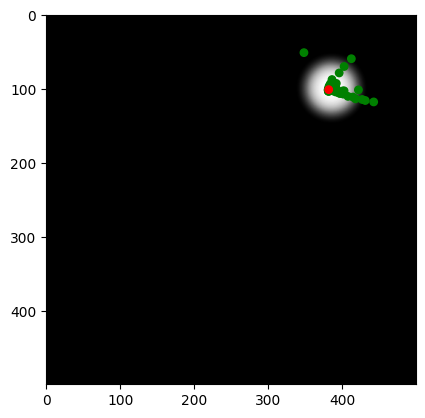

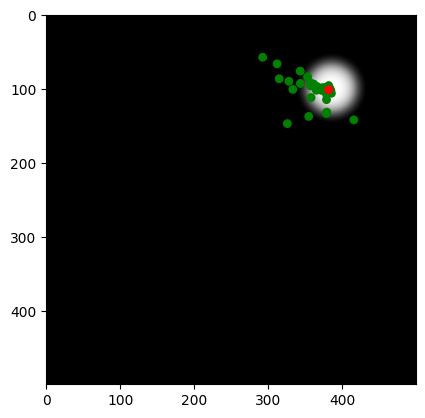

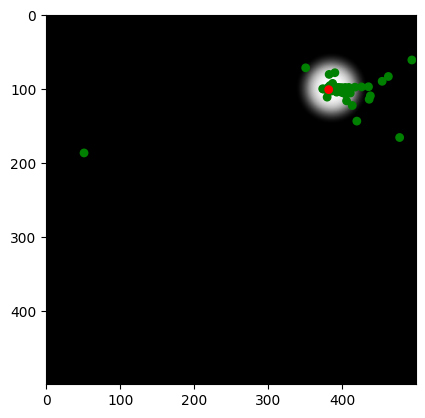

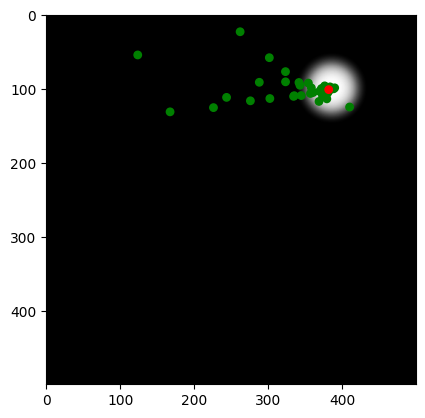

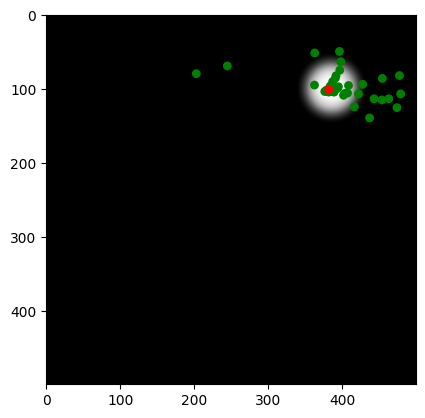

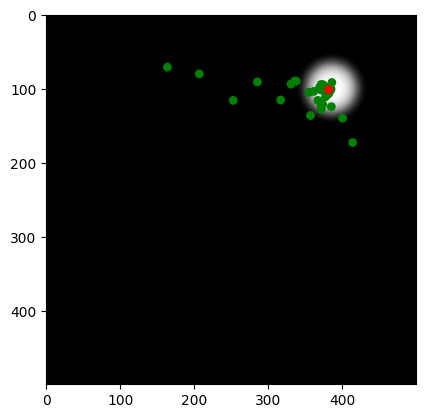

In [ ]:
# MAIN DFO LOOP
for itr in range (maxIterations):
	for i in range(N): # EVALUATION
		fitness[i] = f(X[i,])
	s = np.argmin(fitness) # FIND BEST FLY

	if (itr%100 == 0): # PRINT BEST FLY EVERY 100 ITERATIONS
		print ("Iteration:", itr, "\tBest fly index:", s, 
			   "\tFitness value:", fitness[s])

	# TAKE EACH FLY INDIVIDUALLY 
	for i in range(N): 
		imgplot = plt.imshow(img, cmap='gray') # SHOW IMAGE
		if i == s: continue # ELITIST STRATEGY

		# FIND BEST NEIGHBOUR
		left = (i-1)%N
		right = (i+1)%N
		bNeighbour = right if fitness[right]<fitness[left] else left

		for d in range(D): # UPDATE EACH DIMENSION SEPARATELY 
			if (np.random.rand() < delta):
				X[i,d] = np.random.uniform(lowerB[d], upperB[d])
				continue;

			u = np.random.rand()
			X[i,d] = X[bNeighbour,d] + u*(X[s,d] - X[i,d])

			# OUT OF BOUND CONTROL
			if X[i,d] < lowerB[d] or X[i,d] > upperB[d]:
				X[i,d] = np.random.uniform(lowerB[d], upperB[d])
	for i in range(N):
		if i == s:
			continue
		plt.gca().add_patch( plt.Circle( (X[i,1], X[i,0]), 5, color='g') )
	plt.gca().add_patch( plt.Circle( (X[s,1], X[s,0]), 5, color='r') )
	plt.draw()	# DRAW THE IMAGE AND THE CIRCLE
	plt.pause(0.0001) # PAUSE BEFORE THE NEXT ITERATION IN BETWEEN
	plt.clf()

In [ ]:
for i in range(N): fitness[i] = f(X[i,]) # EVALUATION
s = np.argmin(fitness) # FIND BEST FLY

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n",  X[s,])	